In [1]:

!pip install pyvital vitaldb vital
!pip install neurokit2
import vitaldb
import pandas as pd
import numpy as np

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical data
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # Load track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # Load lab result

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.4 M

In [2]:
df_labs

,caseid,dt,name,result
0,1,594470,alb,2.90
1,1,399575,alb,3.20
2,1,12614,alb,3.40
3,1,137855,alb,3.60
4,1,399575,alt,12.00
...,...,...,...,...
928443,6388,3503,sao2,100.00
928444,6388,408770,wbc,3.28
928445,6388,-32848,wbc,6.27
928446,6388,-249820,wbc,7.66


In [3]:
# inclusion / exclusion criteria
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ECG_II', 'caseid'])
)

print('Total {} cases found'.format(len(caseids)))

Total 6355 cases found


In [4]:
import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()



srate = 100
vals = vitaldb.load_case(caseids[0], ['SNUADC/ECG_II'], 1 / srate)

initial_signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]





In [5]:
op_st = df_cases[(df_cases['caseid'] == caseids[0])]['opstart'].values[0]
op_end = df_cases[(df_cases['caseid'] == caseids[0])]['opend'].values[0]

In [6]:
op_st,op_end

(1668, 10368)

In [8]:
initial_signal = initial_signal[(initial_signal>= -.25) & (initial_signal<=.25)]

In [9]:
#nrml_plt(initial_signal)
print("After Cleaning")
neurokit_filtered_ecg = nk.ecg_clean(initial_signal, sampling_rate=srate)
#nrml_plt(neurokit_filtered_ecg)


After Cleaning


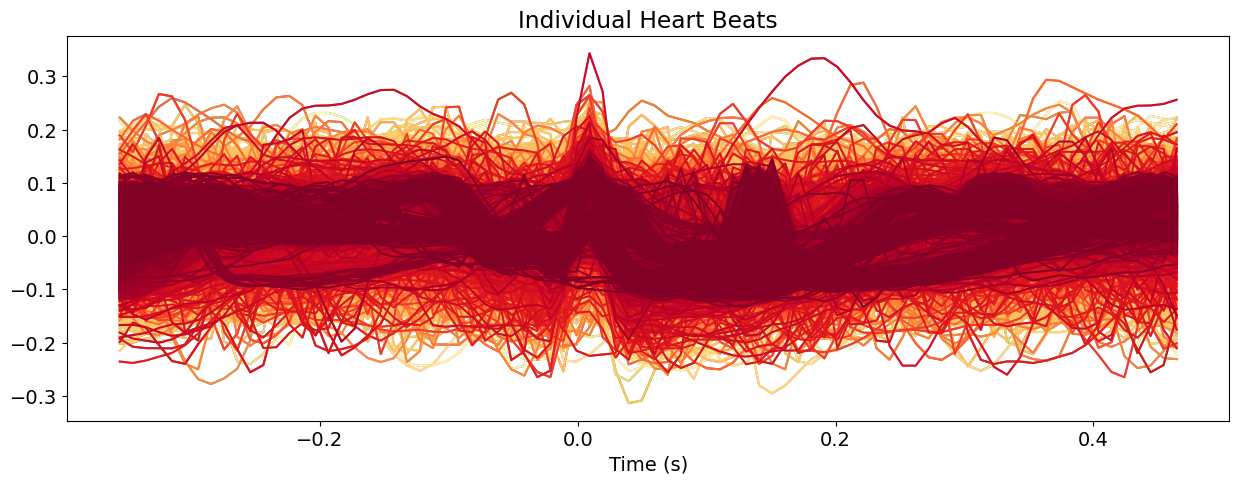

In [10]:
# Plotting all the heart beats
epochs = nk.ecg_segment(neurokit_filtered_ecg, rpeaks=None, sampling_rate=100, show=True)

In [11]:
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(neurokit_filtered_ecg, sampling_rate=100)
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(neurokit_filtered_ecg, rpeaks, sampling_rate=100, method="peak")

In [12]:
ecg_signal = neurokit_filtered_ecg

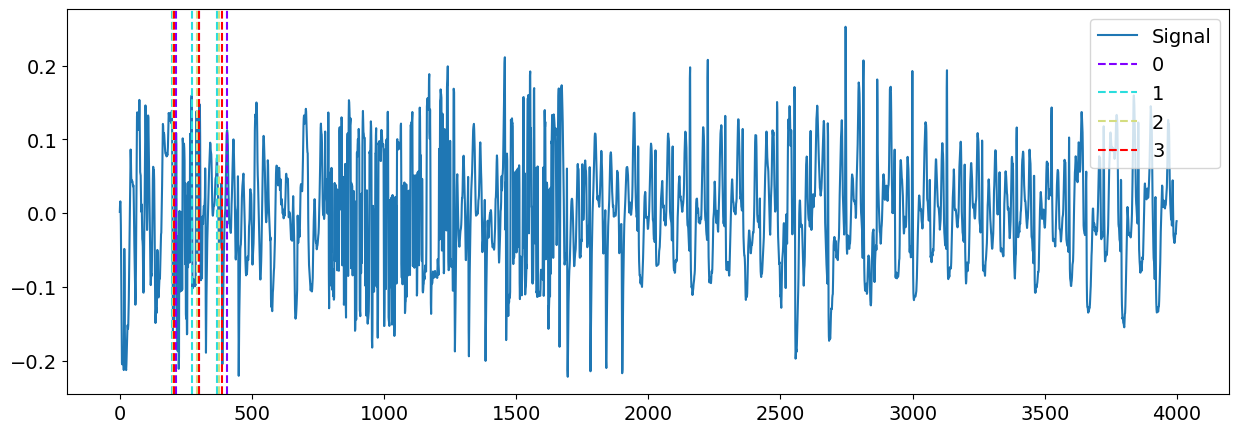

In [13]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:4000])

Error in callback <function _draw_all_if_interactive at 0x7bb6788c92d0> (for post_execute):


KeyboardInterrupt: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


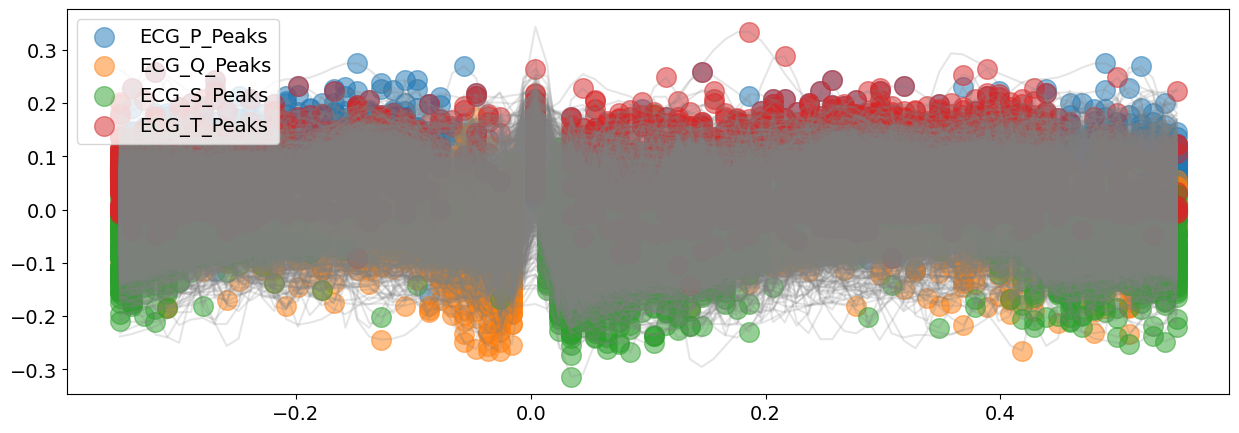

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal,
                                 rpeaks,
                                 sampling_rate=srate,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

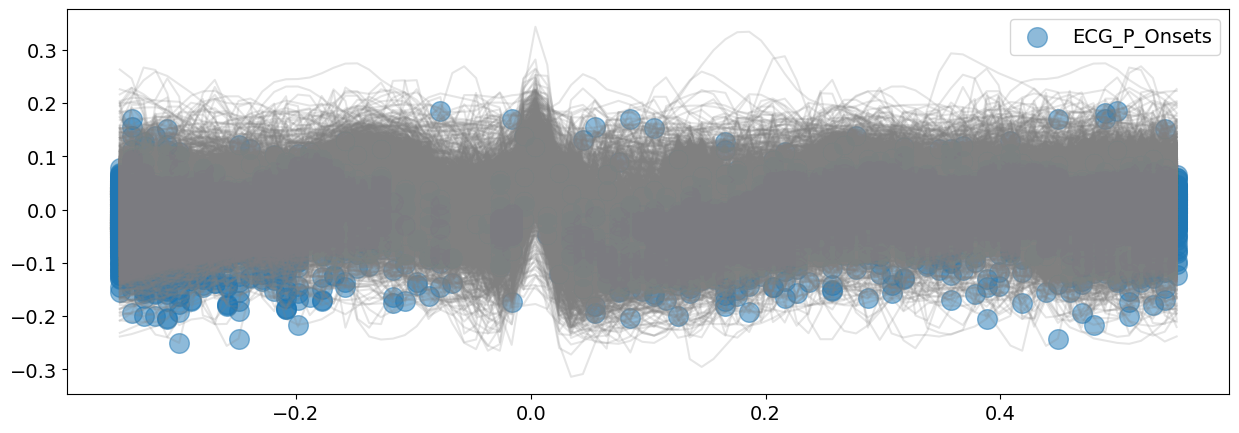

In [ ]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal,
                                           rpeaks,
                                           sampling_rate=srate,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_P')

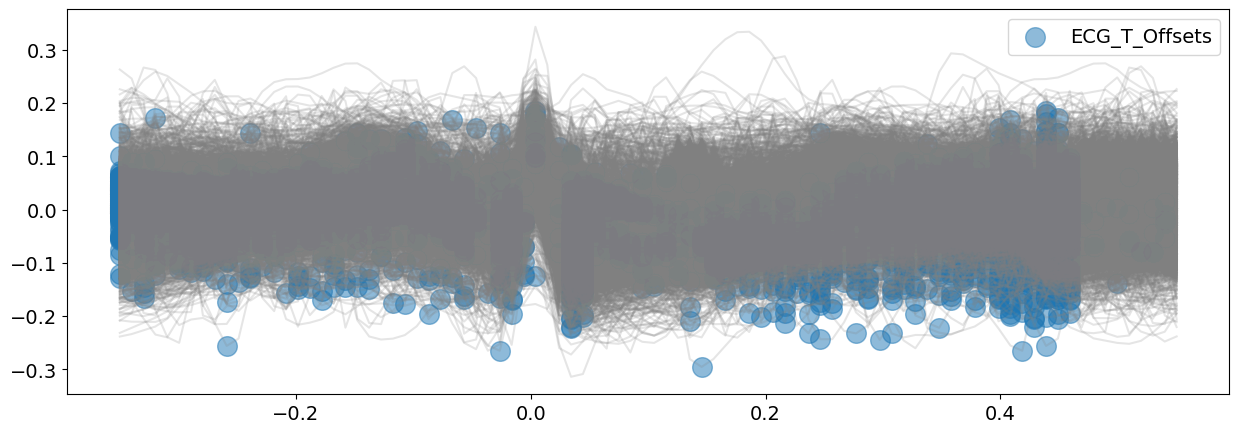

In [ ]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal,
                                           rpeaks,
                                           sampling_rate=srate,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_T')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


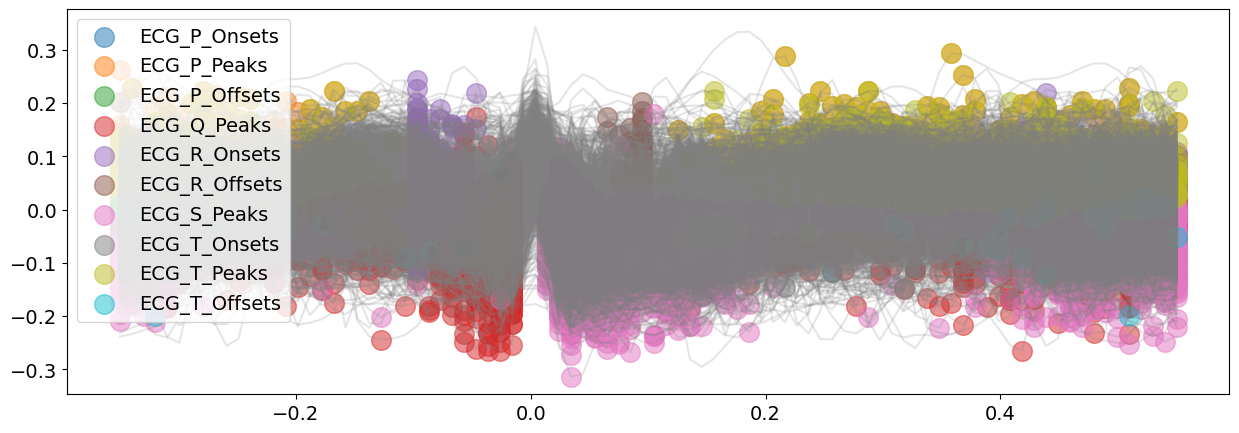

In [ ]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='all')

In [ ]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='peaks')

In [ ]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_T')

In [ ]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_P')

In [ ]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_R')

In [ ]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='all')

In [ ]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='peaks')

In [ ]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_T')

In [ ]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_P')

In [ ]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_R')